Script for '7_day_averages_chile' program in Python<br>
Licensed under the Apache License, Version 2.0<br>
http://www.apache.org/licenses/LICENSE-2.0

The program parses a csv file containing the data of 7-day moving average of covid new cases per 100k inhabitants in Chilean regions, and then produces a multiple plot and a pie plot of the result.

The initial file 'MediaMovil_T.csv' is taken from the Chilean Health Ministry GitHub repository:<br>
https://github.com/MinCiencia/Datos-COVID19

In [17]:
import matplotlib.pyplot as plt; plt.rcdefaults() 
import pandas as pd

In [18]:
# Opens the csv file 'MediaMovil_T.csv' from the Chilean Health Ministry GitHub repository;
# Puts the data in the dataframe df and drops the 'NaN' values:
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto47/MediaMovil_T.csv'
df = pd.read_csv(url)
df = df.dropna()
region_names = list(df.columns.values)[1:17]

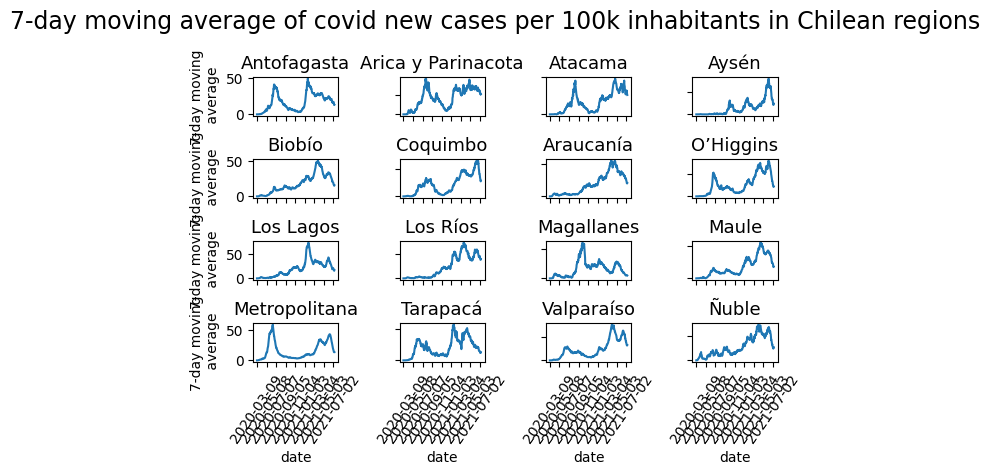

In [19]:
# Generates a 4x4 multiple plot for the 16 Chilean regions:
fig, axes = plt.subplots(4, 4)
fig.suptitle("7-day moving average of covid new cases per 100k inhabitants in Chilean regions", fontsize=17)

for i, axis in enumerate(axes.flat):
  x = df['Region']
  y = df.iloc[:,i+1]
  axis.plot(x, y)
  axis.set_title(region_names[i], fontsize=13)

# Specifies the xlabels, ylabels and xticks of the multiple plot;
# The command 'axis.label_outer()' ensures that the labels are only displayed
# on the external plots (left and bottom) of the multiple plot:
for axis in axes.flat:
  axis.set(xlabel='date', ylabel='7-day moving\n average')
  axis.set_xticks(x[::60])
  axis.set_xticklabels(x[::60], rotation=55, fontsize=10)
  axis.label_outer()
    
fig.tight_layout()

In [20]:
# Collects the data of the final row/date of the dataframe:
last_row = df.tail(1)
final_date = last_row.iloc[0]['Region']
lst = last_row.values.tolist()[0][1:17]
final_total = round(sum(lst), ndigits=1)

In [21]:
# Generates with a loop the 'explode' argument of the pie plot,
# Assigning the nonzero value 0.03 to the region presenting the highest
# 7-day moving average at the final row/date of the dataframe:
explode = []
for i in range(0,16):
  if lst[i] == max(lst):
    explode.append(0.03)
  else:
    explode.append(0)

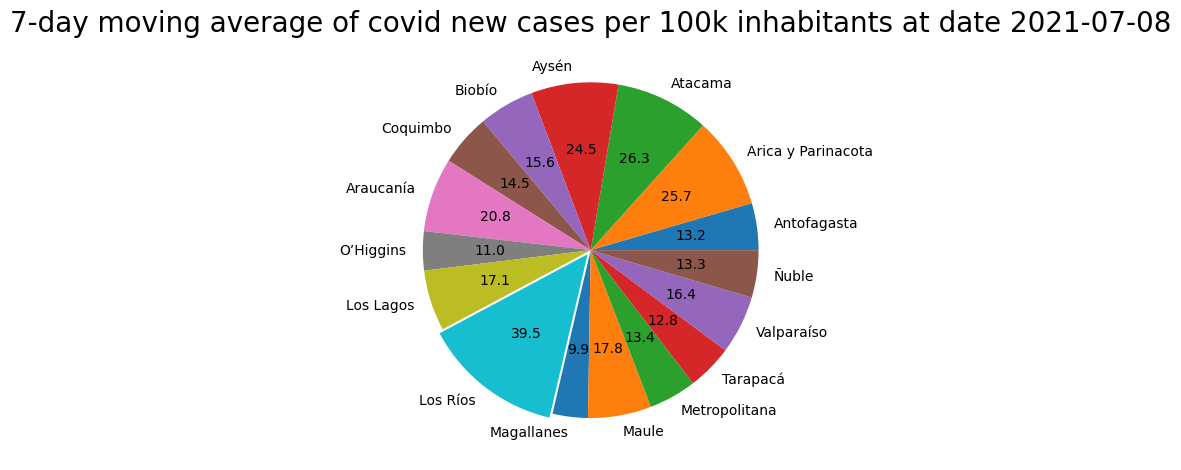

In [22]:
# Plots the pie graph for the final row/date of the dataframe with options 'explode' and 'autopct';
# The 'autopct' argument allows to print within the pies the 7-day moving average of each region:
fig_bis = plt.figure()
plt.pie(lst, labels=region_names, explode=explode,
        autopct=lambda percentage: round(percentage * final_total / 100, ndigits=1))
plt.title(f'7-day moving average of covid new cases per 100k inhabitants at date {final_date}', fontsize=20)
fig_bis.tight_layout()

plt.show()